In [1]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from lattice_dynamics import LatticeDynamics

# Experiments with an L2 lattice model

In [2]:
"""Cool parameters (for oscillating behavior):
    p_si = 4e-2
    p_ir = 8e-3
    p_rs = 1e-3
"""
dyn = LatticeDynamics(size = 50,
                 p_si = 2e-2,
                 p_ir = 8e-3,
                 p_rs = 1e-3,)

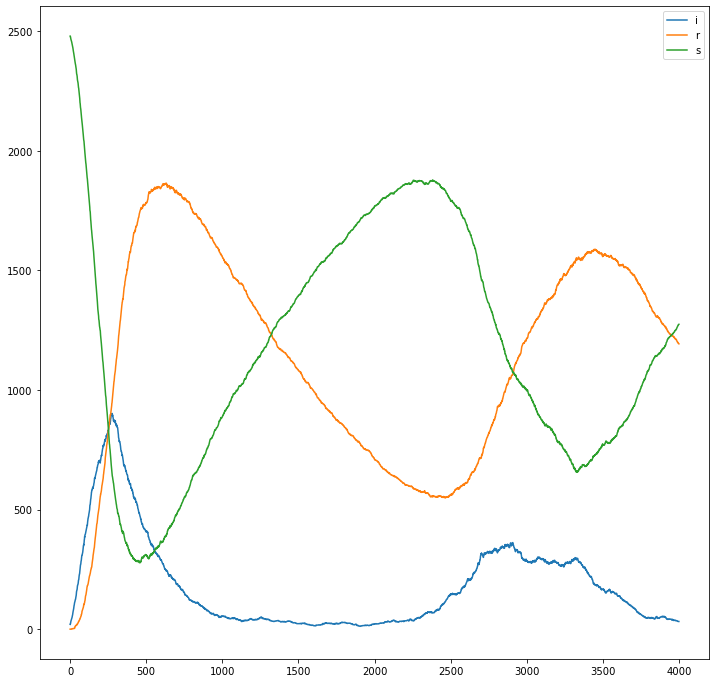

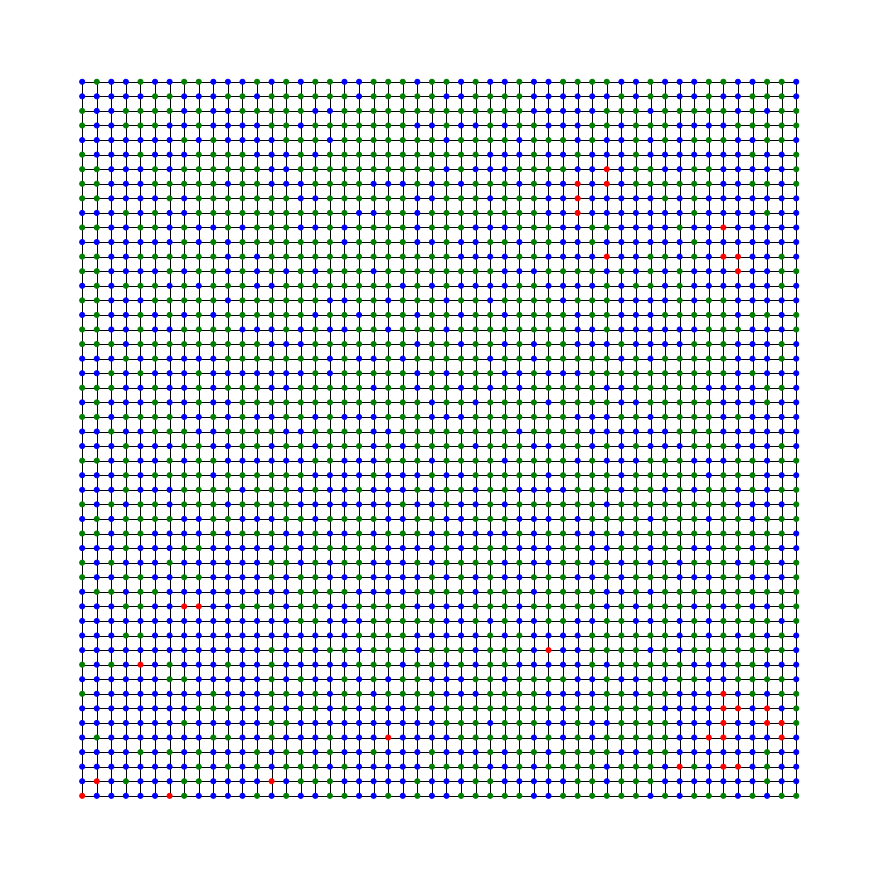

In [116]:
plt.rcParams['figure.figsize'] = [12, 12]
s,i,r = dyn.run_episode(20, 4000)

plt.plot(np.array(i))
plt.plot(np.array(r))
plt.plot(np.array(s))
plt.legend(['i','r','s'])
plt.show()
dyn.plot_state()

In [112]:
suceptible = []
infected = []
removed = []
for e in range(4):
    print("runing simulation {}".format(e))
    s,i,r = dyn.run_episode(20, 6000)
    suceptible.append(s)
    infected.append(i)
    removed.append(r)

runing simulation 0
runing simulation 1
runing simulation 2
runing simulation 3


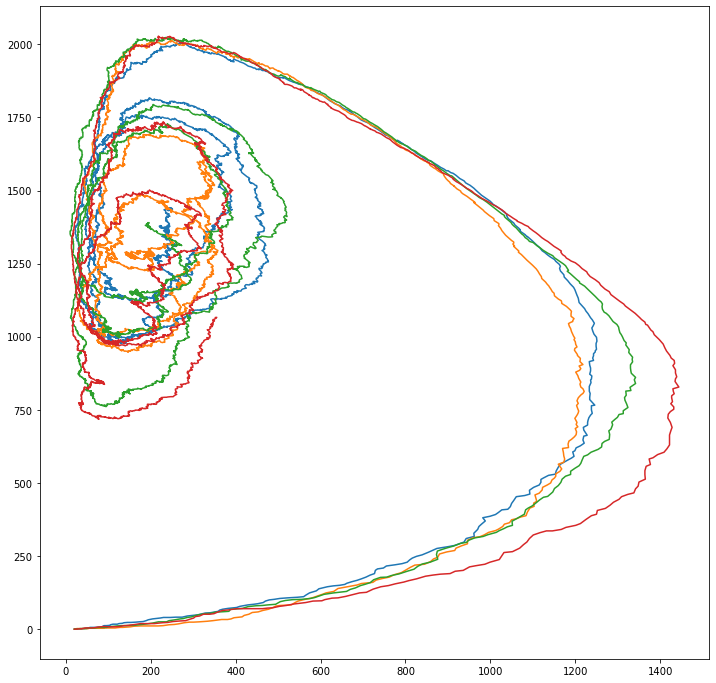

In [113]:
plt.rcParams['figure.figsize'] = [12, 12]
for i in range(4):
    plt.plot(infected[i],removed[i])
plt.show()

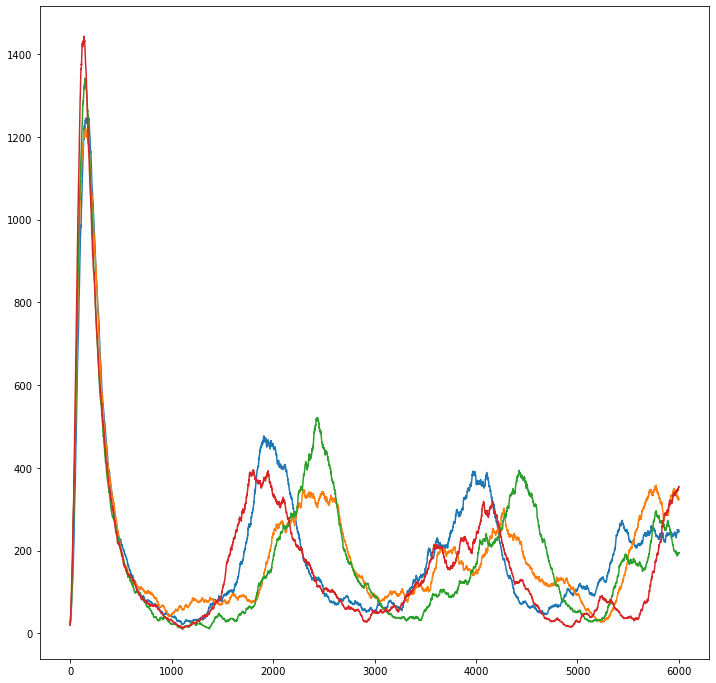

In [114]:
plt.rcParams['figure.figsize'] = [12, 12]
for i in range(4):
    plt.plot(infected[i])
plt.show()

# Designing an ad-hoc, faster model

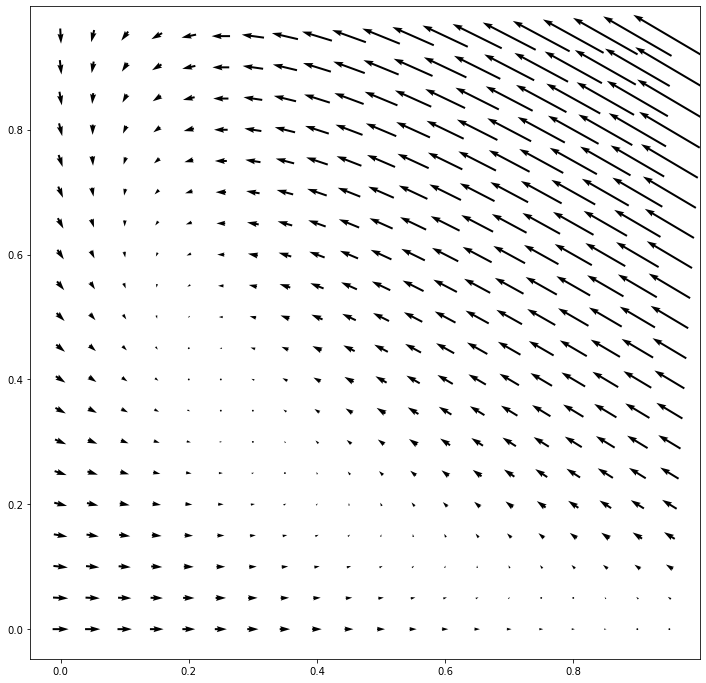

In [327]:
"""Vanilla SIRS model
"""


def sirs(s,i,alpha,beta,gamma):
   ds = np.zeros_like(s)
   di = np.zeros_like(i)
   ds = gamma * (1-s-i) - alpha*s*i
   di = alpha*s*i - beta * i
   return ds,di
alpha = 0.8
beta = 0.2
gamma = 0.03

S, I = np.meshgrid(np.arange(0, 1, .05), np.arange(0, 1, .05))
dS, dI = sirs(S,I,0.4,0.1,0.1)


fig,ax = plt.subplots()
Q = ax.quiver(S, I, dS, dI, units='x', pivot='mid',scale=4)

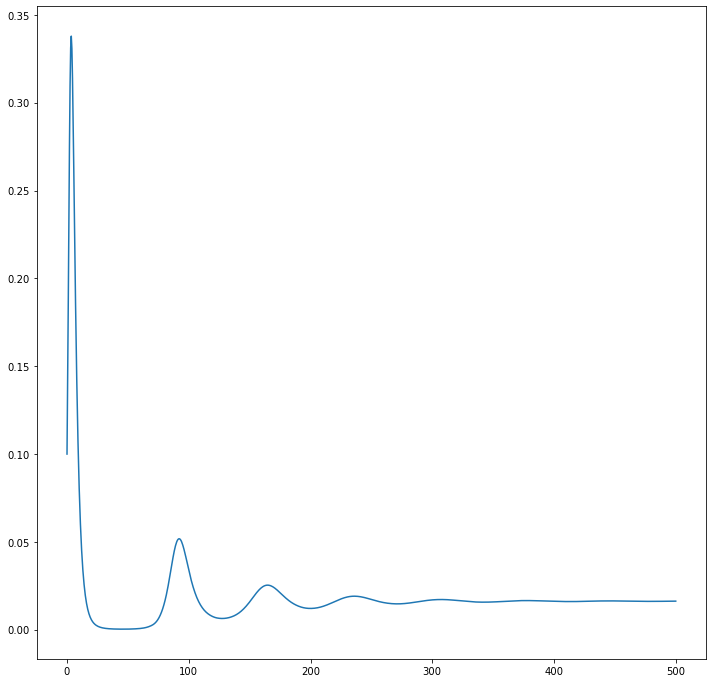

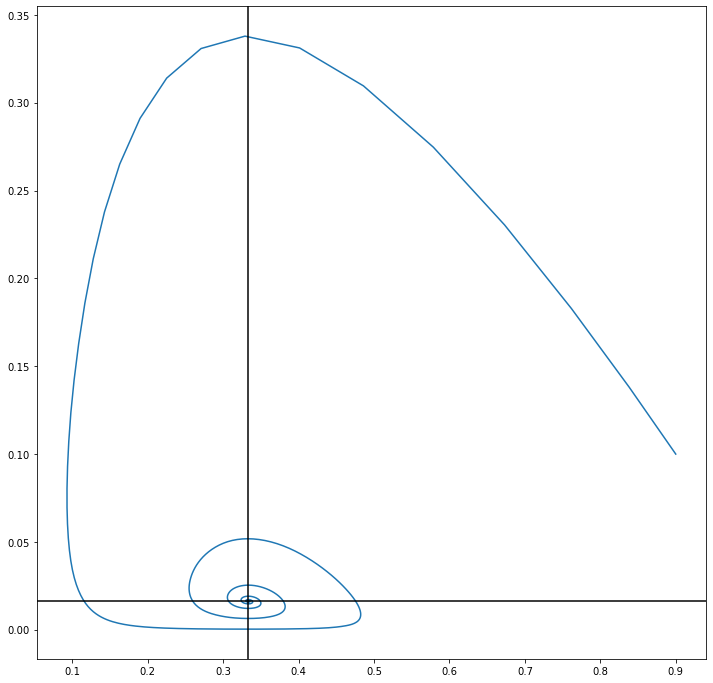

In [334]:
alpha = 1.2
beta = 0.4
gamma = 0.01

def sirs_wrapper(t,y):
   s = y[0]
   i = y[1]
   _ = t
   ds,di = sirs(s,i,alpha,beta,gamma)
   return np.array([ds,di])

tmax = 500

sol = solve_ivp(sirs_wrapper, [0, tmax], [0.9,0.1],dense_output=True)

t = np.linspace(0, tmax, 1000)
z = sol.sol(t)
plt.plot(t,z[1,:])
plt.show()
plt.plot(z[0,:],z[1,:])
plt.axvline(x=beta/alpha,color='k')
plt.axhline(y=gamma*(1-beta/alpha)/(gamma+beta),color='k')
plt.show()

In [374]:
"""Stochastic SIRS model
"""


def stoch_sirs(s,i,alpha,beta,gamma,sigma):
    sig = rd.normal(0,sigma)
    ds = np.zeros_like(s)
    di = np.zeros_like(i)
    ds = gamma * (1-s-i)*(1-i) - (alpha+sig)*s*i
    di = (alpha+sig)*s*i - beta * i**2
    return ds,di

alpha = 0.8
beta = 0.2
gamma = 0.03


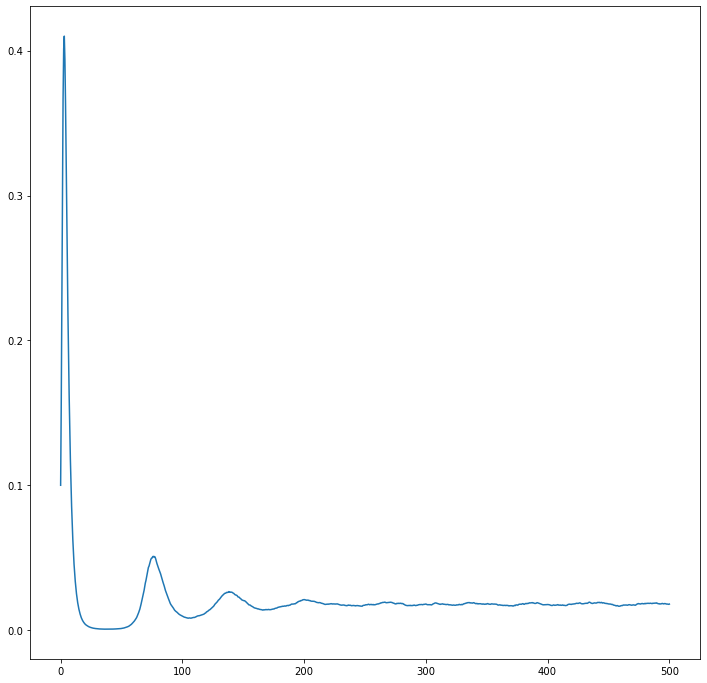

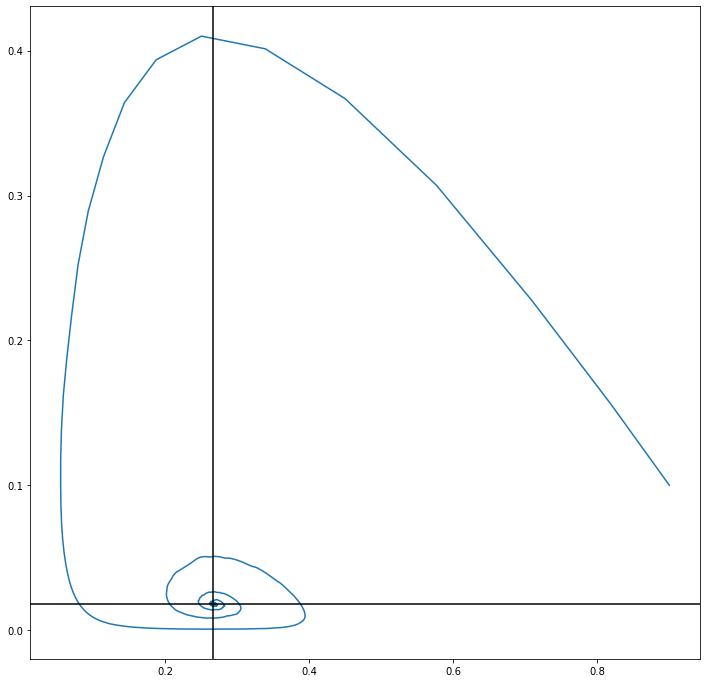

In [376]:
alpha = 1.5
beta = 0.4
gamma = 0.01
sigma = 10
def stoch_sirs_wrapper(t,y):
   s = y[0]
   i = y[1]
   _ = t
   ds,di = stoch_sirs_wrapper(s,i,alpha,beta,gamma,sigma)
   return np.array([ds,di])

tmax = 500

sol = solve_ivp(sirs_wrapper, [0, tmax], [0.9,0.1],dense_output=True)

t = np.linspace(0, tmax, 1000)
z = sol.sol(t)
plt.plot(t,z[1,:])
plt.show()
plt.plot(z[0,:],z[1,:])
plt.axvline(x=beta/alpha,color='k')
plt.axhline(y=gamma*(1-beta/alpha)/(gamma+beta),color='k')
plt.show()